In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignments/spam.csv', encoding='ISO-8859-1')

In [38]:
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [39]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [40]:
df

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [41]:
df.columns = ['label', 'message']

In [42]:
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [43]:
total_rows = len(df) # total no of rows

ham_count = df[df['label'] == 'ham'].shape[0]  # total no of ham in column lable
spam_count = df[df['label'] == 'spam'].shape[0]  # total no of spam in column lable

# Calculating percentages
ham_percentage = (ham_count / total_rows) * 100
spam_percentage = (spam_count / total_rows) * 100

# Output the results
print(f"Percentage of ham: {ham_percentage:.2f}%")
print(f"Percentage of spam: {spam_percentage:.2f}%")


Percentage of ham: 86.59%
Percentage of spam: 13.41%


As the data is imbalanced, accuracy won't be an appropriate metrics. F1-score is better metric as it balances both precision and recall. It will focus on minimizing fall positives which will make spam detection more efficient. Thus, F1-metric is more suitable in this case.

In [44]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [45]:
from pprint import pprint

In [46]:
pprint(df['message'].values[0], width = 80)

('Go until jurong point, crazy.. Available only in bugis n great world la e '
 'buffet... Cine there got amore wat...')


In [47]:
pprint(df['message'].values[1], width = 80)

'Ok lar... Joking wif u oni...'


In [48]:
pprint(df['message'].values[2], width = 80)

('Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA '
 "to 87121 to receive entry question(std txt rate)T&C's apply "
 "08452810075over18's")


In [49]:
pprint(df['message'].values[3], width = 80)

'U dun say so early hor... U c already then say...'


In [50]:
# Function to clean text using spaCy
from typing import List
def spacy_clean_text(text: str) -> List[str]:
    # Process the text using spaCy
    doc = nlp(text)

    # Filter tokens: keep only alphabetic words, remove stop words and punctuations
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    # Join the tokens back into a cleaned string
    return ' '.join(tokens)

In [51]:
df['tokens_message'] = df['message'].apply(spacy_clean_text)

In [52]:
df.head()

label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                      tokens_message  
0  jurong point crazy available bugis n great wor...  
1                              ok lar joke wif u oni  
2  free entry wkly comp win FA Cup final tkts tex...  
3                                u dun early hor u c  
4                              nah think go usf live

In [53]:
pprint(df['tokens_message'].values[0], width = 80)

('jurong point crazy available bugis n great world la e buffet Cine get amore '
 'wat')


In [54]:
df = df.drop(columns=['message'])

In [55]:
df.head()

label                                     tokens_message
0   ham  jurong point crazy available bugis n great wor...
1   ham                              ok lar joke wif u oni
2  spam  free entry wkly comp win FA Cup final tkts tex...
3   ham                                u dun early hor u c
4   ham                              nah think go usf live

In [56]:
df.columns = ['Label', 'Message']

In [57]:
df.head()

Label                                            Message
0   ham  jurong point crazy available bugis n great wor...
1   ham                              ok lar joke wif u oni
2  spam  free entry wkly comp win FA Cup final tkts tex...
3   ham                                u dun early hor u c
4   ham                              nah think go usf live

**Pipeline 1: Sparse Embeddings (TF-IDF):**

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Subset of dataset
sample_df = df.sample(frac=0.05, random_state=40)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(sample_df['Message'], sample_df['Label'], test_size=0.2, random_state=40)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(1,2), max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [59]:
!pip install pyspellchecker

**Pipeline 2: Feature Engineering:**

In [60]:
from spellchecker import SpellChecker

spell = SpellChecker()

def feature_engineering(text):
    return {
        'char_count': len(text),
        'word_count': len(text.split()),
        'digit_count': sum(char.isdigit() for char in text),
        'spelling_mistakes': len(spell.unknown(text.split()))
    }

# Apply feature engineering to small_df
engineered_features = sample_df['Message'].apply(lambda x: pd.Series(feature_engineering(x)))

# Train-test split on engineered features
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(engineered_features, sample_df['Label'], test_size=0.2, random_state=40)


**Pipeline 3: Sparse Embeddings (TF-IDF) + Feature Engineering**

In [61]:
from scipy.sparse import hstack

# Concatenate TF-IDF matrix with engineered features
X_train_combined = hstack([X_train_tfidf, X_train_feat])
X_test_combined = hstack([X_test_tfidf, X_test_feat])

**Model Selection:**

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# Model Training with Class Weights
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred, average='macro')

print(f"F1 Score for TF-IDF only with class weights: {f1_tfidf}")

F1 Score for TF-IDF only with class weights: 0.9183673469387754


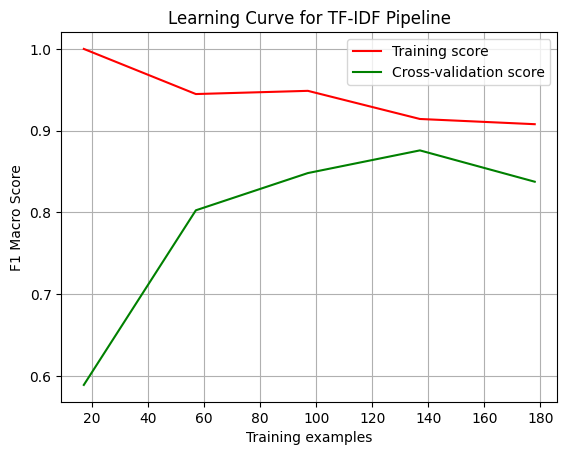

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# Helper function to plot the learning curve
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='f1_macro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="r")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="g")
    plt.xlabel("Training examples")
    plt.ylabel("F1 Macro Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot the learning curve
plot_learning_curve(model, X_train_tfidf, y_train, "Learning Curve for TF-IDF Pipeline")

In [64]:
# Model Training with Class Weights
model1 = LogisticRegression(max_iter=1000, class_weight='balanced')
model1.fit(X_train_feat, y_train_feat)

# Predictions and Evaluation
y_pred_feat = model1.predict(X_test_feat)
f1_feat = f1_score(y_test_feat, y_pred_feat, average='macro')

print(f"F1 Score for Feature Engineering only with class weights: {f1_feat}")

F1 Score for Feature Engineering only with class weights: 0.7171717171717171


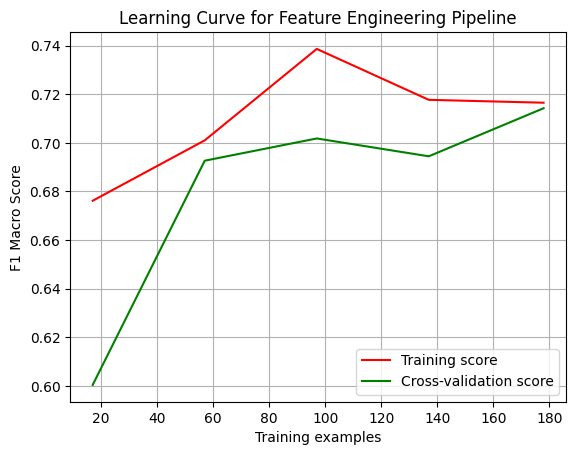

In [65]:
# Helper function to plot the learning curve
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='f1_macro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="r")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="g")
    plt.xlabel("Training examples")
    plt.ylabel("F1 Macro Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot the learning curve for the feature engineering pipeline
plot_learning_curve(model1, X_train_feat, y_train_feat, "Learning Curve for Feature Engineering Pipeline")


In [66]:
# Model Training with Class Weights
model2 = LogisticRegression(max_iter=1000, class_weight='balanced')
model2.fit(X_train_combined, y_train)

# Predictions and Evaluation
y_pred_combined = model2.predict(X_test_combined)
f1_combined = f1_score(y_test, y_pred_combined, average='macro')

print(f"F1 Score for TF-IDF + Feature Engineering with class weights: {f1_combined}")

F1 Score for TF-IDF + Feature Engineering with class weights: 0.801418439716312


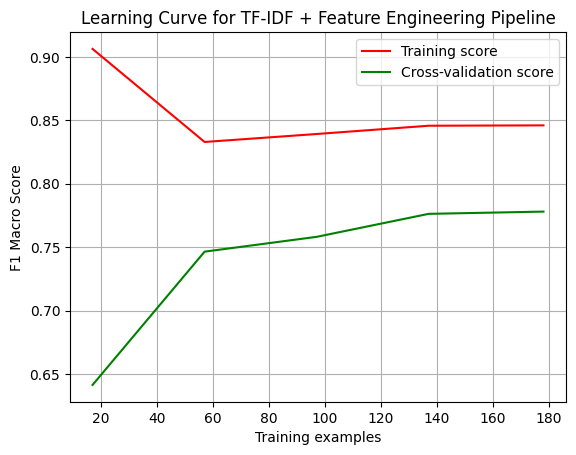

In [67]:
# Helper function to plot the learning curve
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='f1_macro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="r")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="g")
    plt.xlabel("Training examples")
    plt.ylabel("F1 Macro Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot the learning curve for TF-IDF + Feature Engineering pipeline
plot_learning_curve(model2, X_train_combined, y_train, "Learning Curve for TF-IDF + Feature Engineering Pipeline")

We will be using the Pipeline 1 with Sparse embedding as the F1 score of this pipeline is much better than the other 2 pipelines